In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym


# Helper functions

In [34]:
def running_mean(x, N):
    """
    https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
    """
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)



# Q-learning

In [144]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
q_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0
        
        while not done:

            if np.random.uniform(0,1) > epsilon:
                action = np.argmax(q[state, :])
            else:
                action = env.action_space.sample()

            next_state, reward, done, info = env.step(action)

            q[state, action] += learning_rate * (reward + gamma * np.max(q[next_state, :]) - q[state, action])

            total_reward += reward
            state = next_state

        episode_rewards[episode] = total_reward
    q_rewards += episode_rewards
q_rewards /= runs

# Sarsa

In [145]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
sarsa_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(qtable[state, :])
        else:
            action = env.action_space.sample()

        while not done:

            next_state, reward, done, info = env.step(action)

            if np.random.uniform(0,1) > epsilon:
                next_action = np.argmax(q[next_state, :])
            else:
                next_action = env.action_space.sample()

            q[state, action] += learning_rate * (reward + gamma * q[next_state, next_action] - q[state, action])

            total_reward += reward

            state = next_state
            action = next_action

        episode_rewards[episode] = total_reward
    sarsa_rewards += episode_rewards

sarsa_rewards /= runs

# Expected Sarsa

In [146]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
expected_sarsa_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        if np.random.uniform(0,1) > epsilon:
            action = np.argmax(q[state, :])
        else:
            action = env.action_space.sample()

        while not done:
            next_state, reward, done, info = env.step(action)

            if np.random.uniform(0,1) > epsilon:
                next_action = np.argmax(q[next_state, :])
            else:
                next_action = env.action_space.sample()

            qexp = np.mean(q[next_state, :])

            q[state, action] += learning_rate * (reward + gamma * qexp - q[state, action])

            total_reward += reward

            state = next_state
            action = next_action

        episode_rewards[episode] = total_reward
    expected_sarsa_rewards += episode_rewards


# expected_sarsa_rewards = running_mean(rewards, 10)
expected_sarsa_rewards /= runs

# Double Q-learning

In [147]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q1 = np.zeros((state_dim, n_actions))
q2 = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
double_q_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        while not done:
            if np.random.uniform(0,1) > epsilon:
                qavg = (q1 + q2)/2
                action = np.argmax(qavg[state, :])
            else:
                action = env.action_space.sample()

            next_state, reward, done, info = env.step(action)

            if np.random.uniform(0, 1) > 0.5:
                a = np.argmax(q1[next_state, :])
                q1[state, action] += learning_rate * (reward + gamma * q2[next_state, a] - q1[state, action])
            else:
                a = np.argmax(q2[next_state, :])
                q2[state, action] += learning_rate * (reward + gamma * q1[next_state, a] - q2[state, action])

            total_reward += reward
            state = next_state     

        episode_rewards[episode] = total_reward
    double_q_rewards += episode_rewards

double_q_rewards /= runs

# Double Sarsa

In [148]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q1 = np.zeros((state_dim, n_actions))
q2 = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
double_sarsa_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        if np.random.uniform(0,1) > epsilon:
            qavg = (q1 + q2)/2
            action = np.argmax(qavg[state, :])
        else:
            action = env.action_space.sample()

        while not done:
            next_state, reward, done, info = env.step(action)

            if np.random.uniform(0,1) > epsilon:
                qavg = (q1+ q2)/2
                next_action = np.argmax(qavg[state, :])
            else:
                next_action = env.action_space.sample()

            if np.random.uniform(0, 1) > 0.5:
                q1[state, action] += learning_rate * (reward + gamma * q2[next_state, next_action] - q1[state, action])
            else:
                q2[state, action] += learning_rate * (reward + gamma * q1[next_state, next_action] - q2[state, action])

            total_reward += reward

            state = next_state
            action = next_action

        episode_rewards[episode] = total_reward
    double_sarsa_rewards += episode_rewards

double_sarsa_rewards /= runs

# Double Expected Sarsa

In [150]:
env = gym.make("CliffWalking-v0")
n_actions = env.action_space.n
state_dim = env.observation_space.n
q1 = np.zeros((state_dim, n_actions))
q2 = np.zeros((state_dim, n_actions))

gamma = 1.0
epsilon = 0.1
learning_rate = 0.5

runs = 50
total_episodes = 500
double_expected_sarsa_rewards = np.zeros(total_episodes)

for i in range(runs):
    episode_rewards = np.zeros(total_episodes)
    for episode in range(total_episodes):
        state = env.reset()
        done = False
        total_reward = 0

        if np.random.uniform(0,1) > epsilon:
            qavg = (q1 + q2)/2
            action = np.argmax(qavg[state, :])
        else:
            action = env.action_space.sample()

        while not done:
            next_state, reward, done, info = env.step(action)

            if np.random.uniform(0,1) > epsilon:
                qavg = (q1 + q2)/2
                next_action = np.argmax(qavg[state, :])
            else:
                next_action = env.action_space.sample()

            if np.random.uniform(0, 1) > 0.5:
                q2exp = np.mean(q2[next_state, :])
                q1[state, action] += learning_rate * (reward + gamma * q2exp - q1[state, action])
            else:
                q1exp = np.mean(q1[next_state, :])
                q2[state, action] += learning_rate * (reward + gamma * q1exp - q2[state, action])

            total_reward += reward

            state = next_state
            action = next_action

        rewards.append(total_reward)
        episode_rewards[episode] = total_reward
    double_expected_sarsa_rewards += episode_rewards

double_expected_sarsa_rewards /= runs

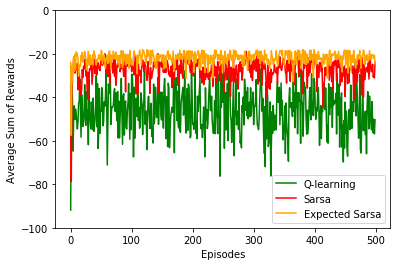

In [158]:
plt.plot(q_rewards, color='green', label='Q-learning')
plt.plot(sarsa_rewards, color='red', label='Sarsa')
plt.plot(expected_sarsa_rewards, color='orange', label='Expected Sarsa')
plt.xlabel('Episodes')
plt.ylabel('Average Sum of Rewards')
plt.ylim([-100, 0])
plt.legend()

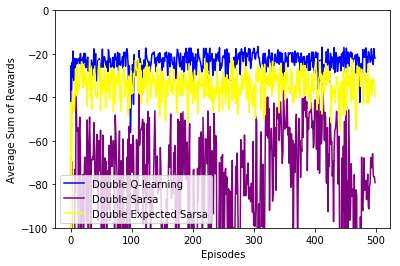

In [157]:
plt.plot(double_q_rewards, color='blue', label='Double Q-learning')
plt.plot(double_sarsa_rewards, color='purple', label='Double Sarsa')
plt.plot(double_expected_sarsa_rewards, color='yellow', label='Double Expected Sarsa')
plt.xlabel('Episodes')
plt.ylabel('Average Sum of Rewards')
plt.ylim([-100, 0])
plt.legend()

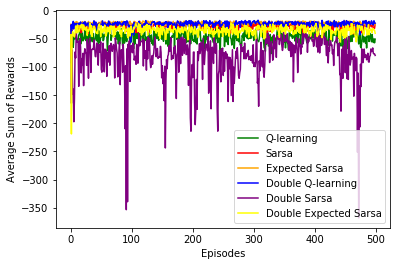

In [160]:
plt.plot(q_rewards, color='green', label='Q-learning')
plt.plot(sarsa_rewards, color='red', label='Sarsa')
plt.plot(expected_sarsa_rewards, color='orange', label='Expected Sarsa')
plt.plot(double_q_rewards, color='blue', label='Double Q-learning')
plt.plot(double_sarsa_rewards, color='purple', label='Double Sarsa')
plt.plot(double_expected_sarsa_rewards, color='yellow', label='Double Expected Sarsa')
plt.xlabel('Episodes')
plt.ylabel('Average Sum of Rewards')
plt.legend()

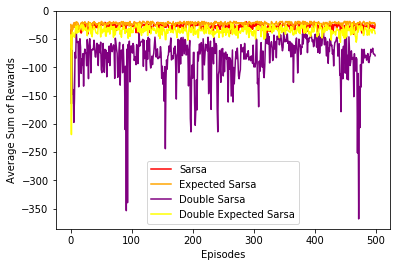

In [162]:
plt.plot(sarsa_rewards, color='red', label='Sarsa')
plt.plot(expected_sarsa_rewards, color='orange', label='Expected Sarsa')
plt.plot(double_sarsa_rewards, color='purple', label='Double Sarsa')
plt.plot(double_expected_sarsa_rewards, color='yellow', label='Double Expected Sarsa')
plt.xlabel('Episodes')
plt.ylabel('Average Sum of Rewards')
plt.legend()

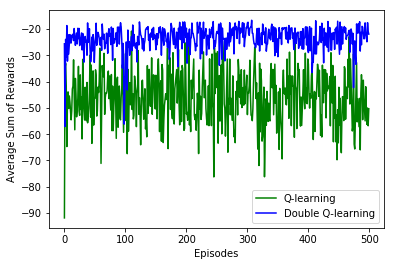

In [156]:
plt.plot(q_rewards, color='green', label='Q-learning')
plt.plot(double_q_rewards, color='blue', label='Double Q-learning')
plt.xlabel('Episodes')
plt.ylabel('Average Sum of Rewards')
plt.legend()